# Modelos ARMA

Antes de comenzar la lección es importante verificar que nuestro directorio de trabajo sea el indicado.

In [1]:
setwd("..")
getwd()

[1] "C:/Users/oscar/OneDrive/Escritorio/AST"

Este curso trata sobre las herramientas econométricas utilizadas para el análisis de series de tiempo.

¿Qué es una serie de tiempo? Pues formalmente es la realización de un proceso estocástico que no es más que una sucesión de variables aleatorias indexadas al tiempo. En términos un poco más informales diríamos que una serie de tiempo es una variable indexada al tiempo simplemente.

Como ejemplo podemos considerar la serie de tiempo del PIB anual de Bolivia.

In [3]:
# Descargar datos del PIB Anual del INE
if (!(file.exists("./Datos/PIB.xlsx"))){
        url1 <- "https://www.ine.gob.bo/index.php/descarga/491/pib-segun-actividad-economica/46183/bolivia-producto-interno-bruto-a-precios-constantes-segun-actividad-economica-1988-2019.xlsx"
        download.file(url1, destfile = "./Datos/PIB.xlsx", mode = "wb")
}

In [4]:
# Instalar el conjunto de paquetes tidyverse
# install.packages("tidyverse")
# Se procede a cargar los paquetes
library(ggplot2)
library(readxl)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'readxl' was built under R version 3.6.3"

In [5]:
pib_raw <- read_xlsx("./Datos/PIB.xlsx", sheet = 1, range = "B10:AG11", col_names = FALSE)
pib_raw <- as.data.frame(t(pib_raw), stringAsFactors = FALSE)
rownames(pib_raw) <- NULL
colnames(pib_raw) <- c("Fecha", "PIB")
head(pib_raw)

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...


Fecha,PIB
1988,14219987
1989,14758943
1990,15443136
1991,16256453
1992,16524115
1993,17229578


In [6]:
tail(pib_raw)

,Fecha,PIB
27,2014,40588156
28,2015,42559599
29,2016,44374306
30,2017(p),46235899.827093497
31,2018(p),48188730.162800297
32,2019(p),49256932.52842477


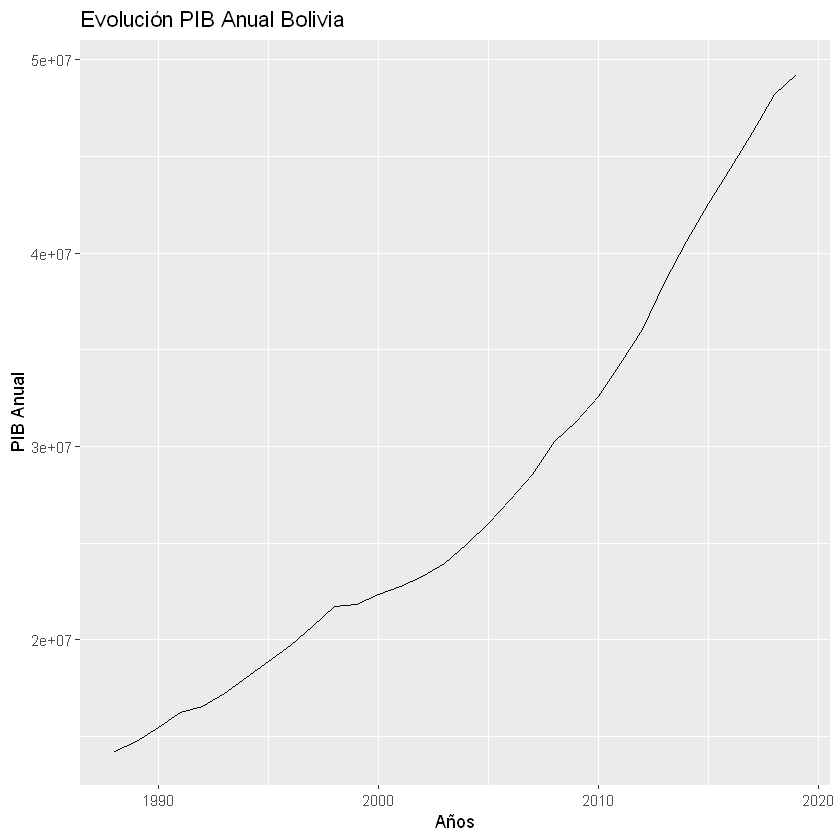

In [7]:
# Procedemos a graficar el PIB Anual de Bolivia
fecha <- seq(as.Date("01/01/1988", "%d/%m/%Y"), as.Date("01/01/2019", "%d/%m/%Y"), by = "year")
pib_raw$Fecha <- fecha
g <- ggplot(data = pib_raw, aes(x = Fecha, y = as.numeric(as.character(PIB))))
g + geom_line() + labs(title = "Evolución PIB Anual Bolivia", x = "Años", y = "PIB Anual")

Este es un ejemplo de una serie de tiempo. Antes de comenzar a estudiar las herramientas del análisis de las series de tiempo es importante conocer la matemática básica necesaria para el entendimiento de las series de tiempo.

Esta herramienta básica son las ecuaciones en diferencia.

## 1. Ecuaciones en diferencia 

Una ecuación en diferencia no es más que una relacion dinámica de una variable determinística o aleatoria. Empezemos con el modelo determinístico. Sea $y_t$ una serie de tiempo que presenta la siguiente relación:

$$y_t = \phi y_{t - 1} + w_t$$

Esta es una **ecuación en diferencia de primer orden**. Necesitamos saber tres cosas:
- ¿Cuál es su solución?
- ¿Cuál es la condición de estabilidad?
- ¿Cuál es el impacto de una variación de $w_t$ en $y_{t + j}$ a medida que $j \to \infty$?

Supongamos que conocemos el valor de $y_{t - 1}$ y conocemos los valores de $w_t$ de t a $j$. Entonces recursivamente podemos obtener los valores de $y_{t + j}$ de $j = 0$ a $j = \infty$. Entonces:

$$y_{t + 1} = \phi y_t + w_{t + 1} = \phi^2 y_{t - 1} + \phi w_t + w_{t + 1}$$
$$y_{t + 2} = \phi y_{t + 1} + w_{t + 2} = \phi^3 y_{t - 1} + \phi^2 w_t + \phi w_{t + 1} + w_{t + 2}$$
$$\vdots$$
$$y_{t + j} = \phi^{j + 1} y_{t - 1} + \phi^j w_t + \phi^{j - 1} w_{t + 1} + \dots + w_{t + j}$$

Esta última ecuación seria la solucion de la **ecuación en diferencia de primer orden**.

Veamos ahora el caso de una **ecuación en diferencia de orden p**.

$$y_t = \phi_1 y_{t - 1} + \phi_2 y_{t - 2} + \dots + \phi_p y_{t - p} + w_t$$

podemos expresar esta ecuación en forma matricial considerando:

$$ Y_t = \left[\begin{array}{c}y_t \\
                               y_{t - 1} \\
                               \vdots \\
                               y_{t - p + 1}\end{array}\right]$$

$$ F = \left[\begin{array}{cccc}\phi_1 & \phi_2 & \dots & \phi_p \\
                                1 & 0 & \dots & 0 \\
                                0 & 1 & \dots & 0 \\
                                \vdots & \vdots & \dots & \vdots \\
                                0 & 0 & \dots & 0\end{array}\right]$$

$$ v_t = \left[\begin{array}{c}w_t \\
                               0 \\ 
                               0 \\
                               \vdots \\
                               0\end{array}\right] $$
                               
Con esto, la **ecuación en diferencias de orden p** quedaría reescrita como una **ecuación en diferencias de primer orden**:

$$ Y_t = F Y_{t - 1} + v_t $$

La solución a esta ecuación vendría dada por:

$$ Y_{t + j} = F^{j + 1} Y_{t - 1} + F^j v_t + F^{j - 1}v_{t + 1} + \dots + v_{t + j} $$
                           

En el caso de la condición de estabilidad podemos ver que para el caso de la **ecuación en diferencia de primer order** es suficiente que $|\phi| < 1$ para que la solución sea estable. Otros valores generarían una solución explosiva a medida que $j \to \infty$.

Para el caso de las **ecuaciones en diferencia de orden p** es necesario un poco más de análisis para establecer las condiciones de estabilidad. Hemos visto que estas ecuaciones pueden representarse como una **ecuación en diferencias de primer orden** en forma matricial, la solución de la **ecuación en diferencias de orden p** vendría dada por:

$$ y_{t + j} = f_{11}^{(j + 1)} y_{t - 1} + f_{12}^{(j + 1)} y_{t - 2} + \dots + f_{1p}^{(j + 1)} y_{t - p} + f_{11}^{(j)} w_t + f_{11}^{(j - 1)} w_{t + 1} + \dots + w_{t + j} $$ 

Entonces la estabilidad de la **ecuación en diferencias de orden p** depende de los elementos $f_{1i}^{(j)}$ de la matriz $F^j$ a medida que $j \to \infty$.

Si la matriz F posee $p$ distintos autovalores, para simplificar el análisis podemos descomponer la matriz $F$ de la siguiente forma:

$$ F = T \Lambda T^{-1} $$

donde $\Lambda$ es una matriz diagonal de distintos autovalores $\lambda_i$:

$$ \left[\begin{array}{ccccc} \lambda_1 & 0 & 0 & \dots & 0 \\
                              0 & \lambda_2 & 0 & \dots & 0 \\
                              \vdots & \vdots & \vdots & \dots & \vdots \\
                              0 & 0 & 0 & \dots & \lambda_p \end{array}\right] $$
                              
y $T$ es una matriz con cada vector columna siendo un autovector de la matriz $F$ con esto podemos reescribir:

$$ F^j = T \Lambda^j T^{-1} $$

dado que los autovalores de una matriz pueden ser reales o imaginarios, a raíz de esta última relación podemos concluir que la **ecuación en diferencias de orden p** es estable si todos los autovalores de la matriz $F$ estan **dentro del [círculo unitario](https://en.wikipedia.org/wiki/Complex_number).**

Puede verse Hamilton(1994) para comprobar que los autovalores de la matriz $F$ satisfacen la ecuación polinómica:

$$ \lambda^p - \phi_1 \lambda^{p - 1} - \phi_2 \lambda^{p - 2} - \dots - \phi_{p - 1} \lambda - \phi_p = 0 $$

Finalmente, ¿cuál es la respuesta de $y_{t + j}$ ante una variación exógena de $w_t$? Esto se conoce como **impulso - respuesta**.

Para el caso de la **ecuación en diferencia de primer orden** es sencillo responder esta pregunta:

$$ \frac{\partial y_{t + j}}{\partial w_t} = \phi^j $$

Podemos verificar que si se cumple la condicion de estabilidad, la respuesta se desvanece en el tiempo.

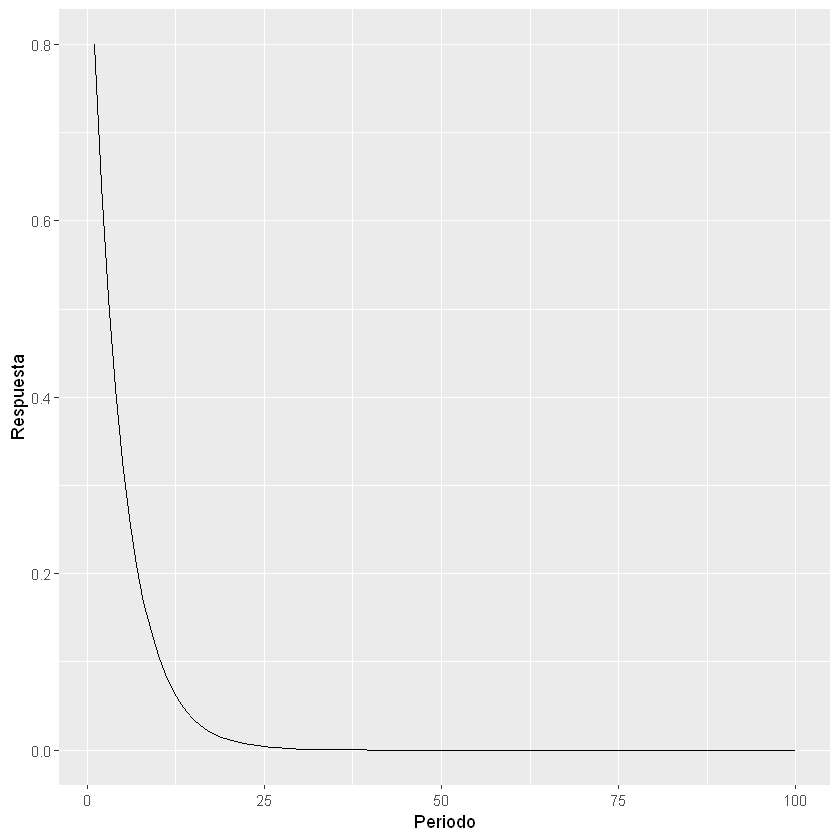

In [8]:
phi <- 0.8
j <- 1:100
x <- phi ^ j
datos <- data.frame(Periodo = j, Respuesta = x)
g <- ggplot(data = datos, aes(x = Periodo, y = Respuesta))
g + geom_line()

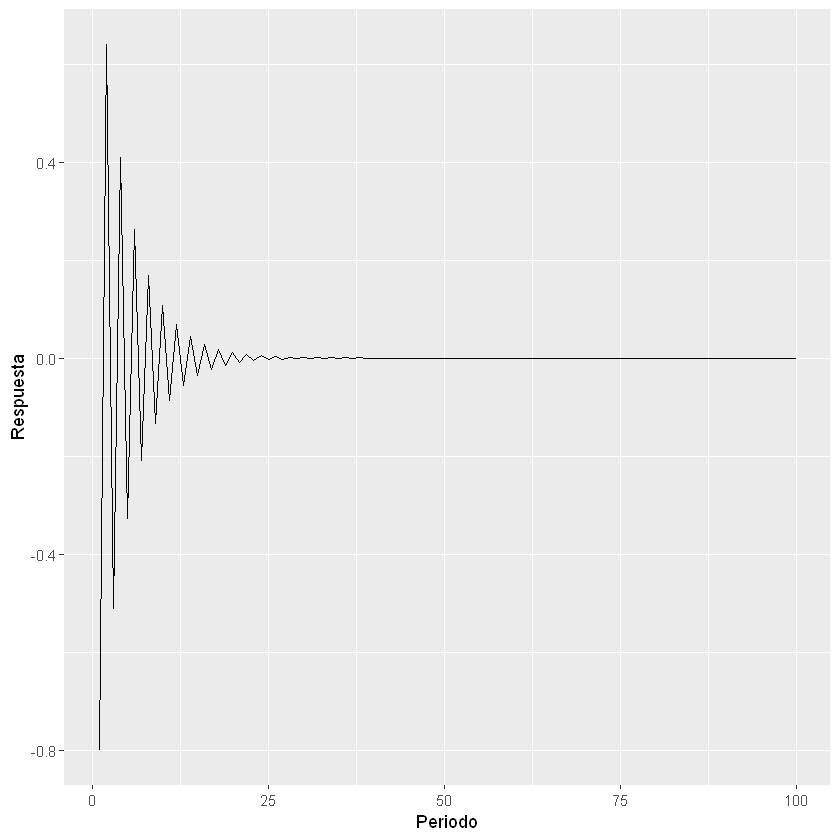

In [9]:
phi <- -0.8
j <- 1:100
x <- phi ^ j
datos <- data.frame(Periodo = j, Respuesta = x)
g <- ggplot(data = datos, aes(x = Periodo, y = Respuesta))
g + geom_line()

Analogamente para el caso de las **ecuaciones en diferencias de orden p**, la función impulso - respuesta viene dada por:

$$ \frac{\partial y_{t + j}}{\partial w_t} = f_{11}^{(j)} $$

es el primer elemento de la matriz $F^j$. En Hamilton(1994) puede verse que:

$$ \frac{\partial y_{t + j}}{\partial w_t} = c_1 \lambda_1^j + c_2 \lambda_2^j + \dots + c_p \lambda_p^j $$

donde $c_i = \frac{\lambda_i^{p - 1}}{\prod_{k = 1, k \neq i}^{p}(\lambda_i - \lambda_k)}$.

Si todos los autovalores están dentro del círculo unitario, la solución es estable y la función impulso - respuesta tiende a desvanecerse en el tiempo.

## 2. Operadores de rezago

Un operador solamente transforma una serie de tiempo en otra serie de tiempo. En este caso particular, el operador de rezago, como su nombre lo dice, transforma una serie de tiempo en su pasado inmediato, el periodo anterior. Es decir:

$$ Lx_t = x_{t - 1} $$

Podemos utilizar el operador de rezago para hallar la solución de una ecuación en diferencia. Tomemos el caso de la siguiente **ecuación en diferencias de primer orden**:

$$ y_{t + j} = \phi y_{t + j - 1} + w_{t + j} $$

podemos reescribir la ecuación como:

$$ (1 - \phi L)y_{t + j} = w_{t + j} $$

teniendo en cuenta que contamos con la informacion de $y_{t - 1}$ y de todos los $w_{t + j}$ para $j = 0, 1, \dots$. Podemos multiplicar ambos lados de la ecuación por $(1 + \phi L + \phi^2 L^2 + \dots + \phi^j L^j)$. Entonces:

$$ (1 - \phi^{j + 1} L^{j + 1})y_{t + j} = (1 + \phi L + \phi^2 L^2 + \dots + \phi^j L^j)w_{t + j} $$

$$ y_{t + j} = \phi^{j + 1}y_{t - 1} + \phi^j w_t + \phi^{j - 1}w_{t + 1} + \dots + w_{t + j} $$

que es la misma solución obtenida en la sección anterior para el caso de una **ecuación en diferencia de primer orden**.

Los operadores de rezago no solo son útiles para hallar soluciones a ecuaciones en diferencia sino tambien para determinar la estabilidad de las mismas.

Tomemos el caso de la **ecuación en diferencias de orden p**:

$$ y_t = \phi_1 y_{t - 1} + \phi_2 y_{t - 2} + \dots + \phi_p y_{t - p} + w_{t} $$

podemos reescribir la ecuación como:

$$ (1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p) y_t = w_t $$

El término en la izquierda puede ser reescrito como:

$$ (1 - \phi_1 z - \phi_2 z^2 - \dots - \phi_p z^p) = (1 - \lambda_1 z)(1 - \lambda_2 z) \dots (1 - \lambda_p z) $$

Este polinomio se lo conoce como **el polinomio característico** y las raíces del mismo son $z_i = \lambda^{-1}_i$. Es decir, son la inversa de los autovalores de la matriz $F$ vista en la sección anterior. 

Concluímos en la sección anterior que la estabilidad de una **ecuación en diferencia de orden p** era garantizada si todos los autovalores de la matriz $F$ están dentro del círculo unitario. Con el uso de los operadores de rezago, concluimos que la estabilidad está garantizada si todas las raíces del **polinomio característico** están fuera del círculo unitario.

Cualquier afirmación es equivalente.

## 3. Modelos Estacionarios ARMA